In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the csv
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

In [4]:
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [5]:
#Data cleaning

In [6]:
df['NoOfDegitsInURL'].value_counts() #Degit was most likely meant to be digit

NoOfDegitsInURL
0      184334
1        8816
2        6609
3        5708
6        5356
        ...  
631         1
437         1
194         1
143         1
164         1
Name: count, Length: 182, dtype: int64

In [7]:
df = df.rename(columns={
    'NoOfDegitsInURL': 'NoOfDigitsInURL',
    'DegitRatioInURL': 'DigitRatioInURL'
})

In [8]:
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDigitsInURL', 'DigitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [9]:
#Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [10]:
#Check for duplicates
df.duplicated().sum()

0

In [11]:
df['label'].value_counts()
#1 represents a legitimate URL, 0 represents a phishing URL

label
1    134850
0    100945
Name: count, dtype: int64

In [12]:
#EDA

In [14]:
#Relationship between URL length and whether it is a phishing link

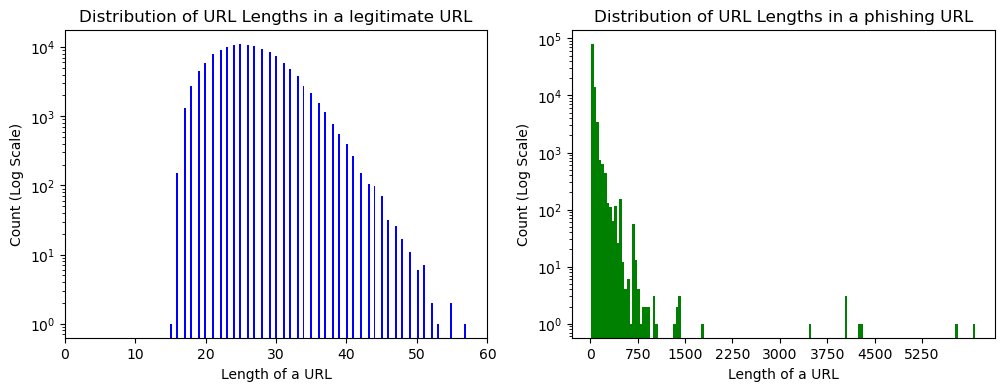

In [15]:
#Data
data1 = df[df['label'] == 1]['URLLength']  #Legitimate URL data
data2 = df[df['label'] == 0]['URLLength']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of URL Lengths in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Length of a URL")
axes[0].set_xticks(ticks=range(0, 70, 10))
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of URL Lengths in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Length of a URL")
axes[1].set_xticks(ticks=range(0,5500,750))
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

In [16]:
#Relationship between number of letters in the URL and whether it is a phishing link

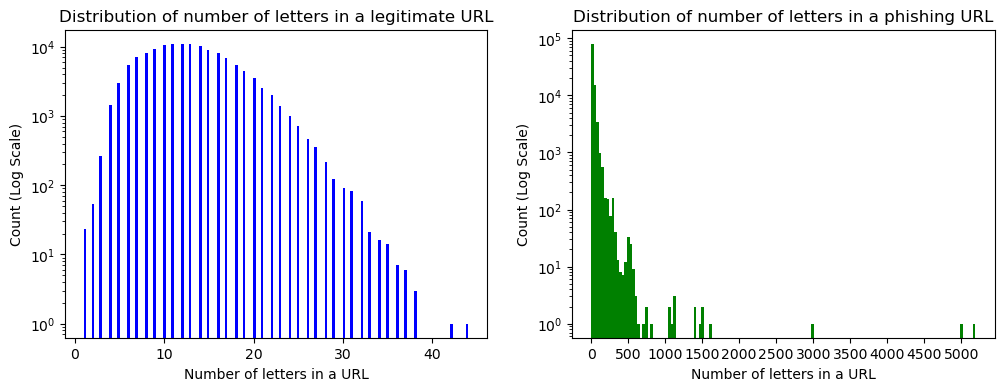

In [17]:
#Data
data1 = df[df['label'] == 1]['NoOfLettersInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfLettersInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of number of letters in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of letters in a URL")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of number of letters in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of letters in a URL")
axes[1].set_ylabel("Count (Log Scale)")
axes[1].set_xticks(ticks=range(0, 5500, 500)) #Specify grid

plt.show()

In [18]:
#Relationship between number of letters in the URL and length of a URL

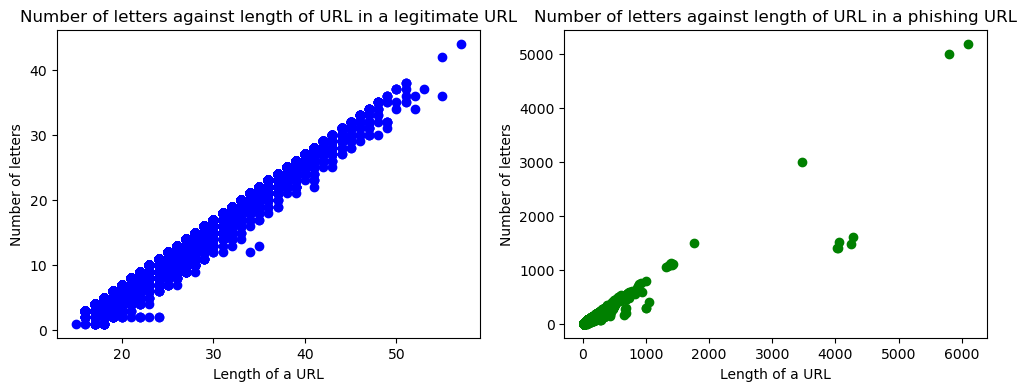

In [19]:
#Data
data1 = df[df['label'] == 1]  #Legitimate URL data
data2 = df[df['label'] == 0]  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].scatter(data1['URLLength'], data1['NoOfLettersInURL'], color='blue')
axes[0].set_title("Number of letters against length of URL in a legitimate URL") #Title
axes[0].set_xlabel("Length of a URL")
axes[0].set_ylabel("Number of letters")

# Plot the second histogram
axes[1].scatter(data2['URLLength'], data2['NoOfLettersInURL'],  color='green')
axes[1].set_title("Number of letters against length of URL in a phishing URL")
axes[1].set_xlabel("Length of a URL")
axes[1].set_ylabel("Number of letters")

plt.show()

In [24]:
#Relationship between ratio of digits in the URL and whether it is a phishing link

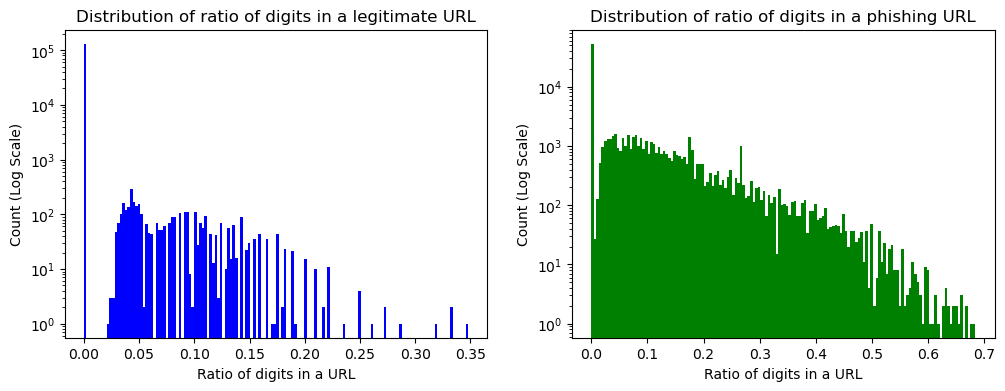

In [25]:
#Data
data1 = df[df['label'] == 1]['DigitRatioInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['DigitRatioInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of ratio of digits in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Ratio of digits in a URL")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of ratio of digits in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Ratio of digits in a URL")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

In [26]:
#Relationship between number of equals in the URL and whether it is a phishing link

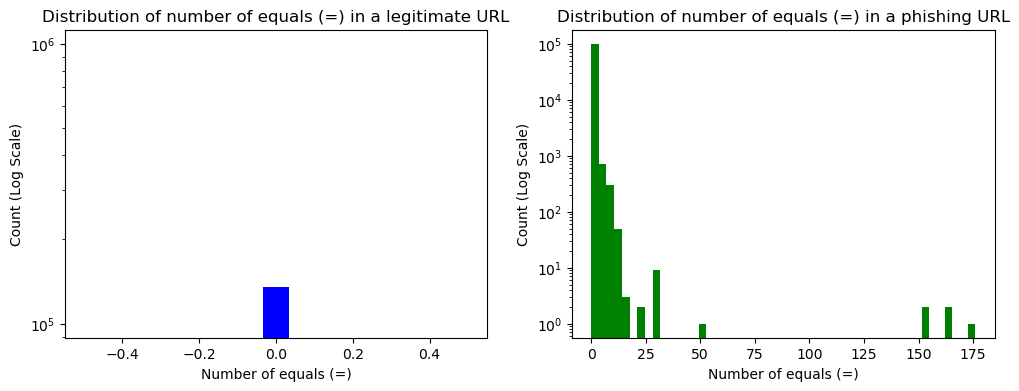

In [27]:
#Data
data1 = df[df['label'] == 1]['NoOfEqualsInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfEqualsInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=15, color='blue')
axes[0].set_title("Distribution of number of equals (=) in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of equals (=)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of equals (=) in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of equals (=)")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

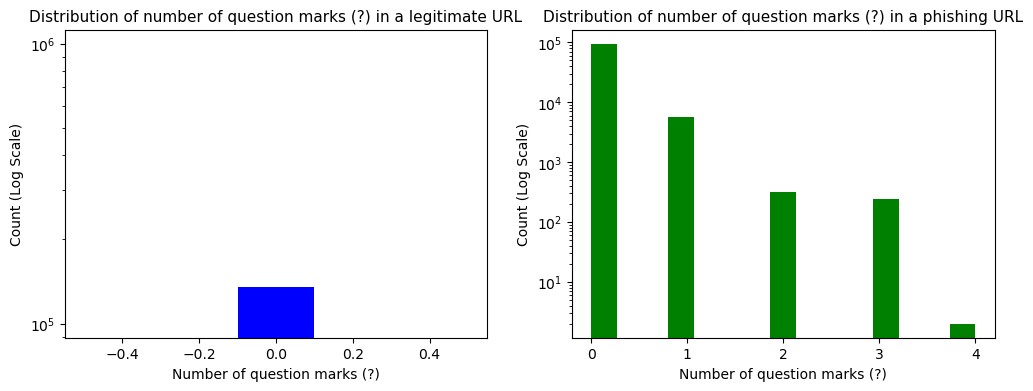

In [28]:
#Data
data1 = df[df['label'] == 1]['NoOfQMarkInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfQMarkInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=5, color='blue')
axes[0].set_title("Distribution of number of question marks (?) in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of question marks (?)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=15, color='green')
axes[1].set_title("Distribution of number of question marks (?) in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of question marks (?)")
axes[1].set_xticks(ticks=range(0,5,1))
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

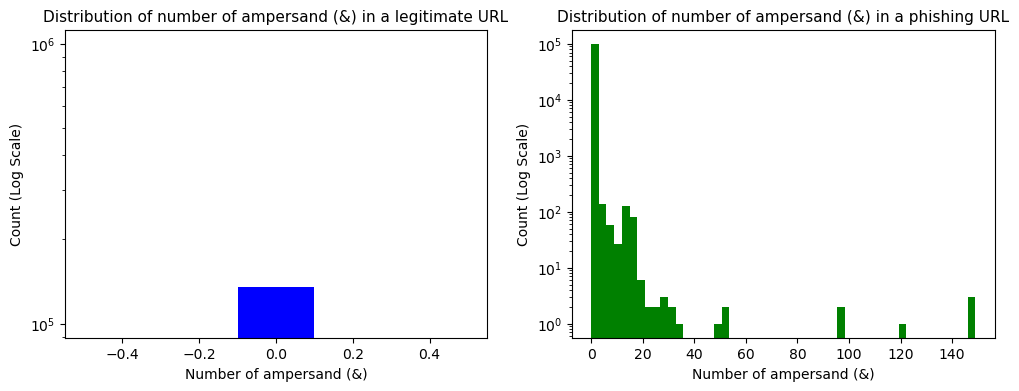

In [29]:
#Data
data1 = df[df['label'] == 1]['NoOfAmpersandInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfAmpersandInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=5, color='blue')
axes[0].set_title("Distribution of number of ampersand (&) in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of ampersand (&)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of ampersand (&) in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of ampersand (&)")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

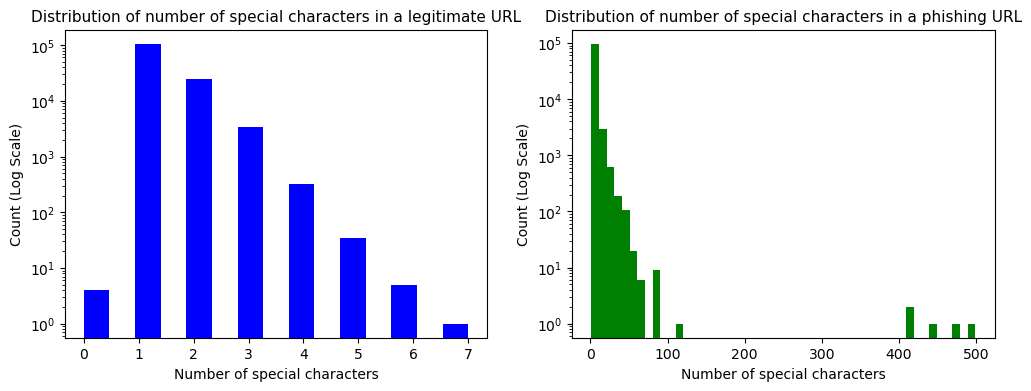

In [30]:
#Data
data1 = df[df['label'] == 1]['NoOfOtherSpecialCharsInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfOtherSpecialCharsInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=15, color='blue')
axes[0].set_title("Distribution of number of special characters in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of special characters")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of special characters in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of special characters")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

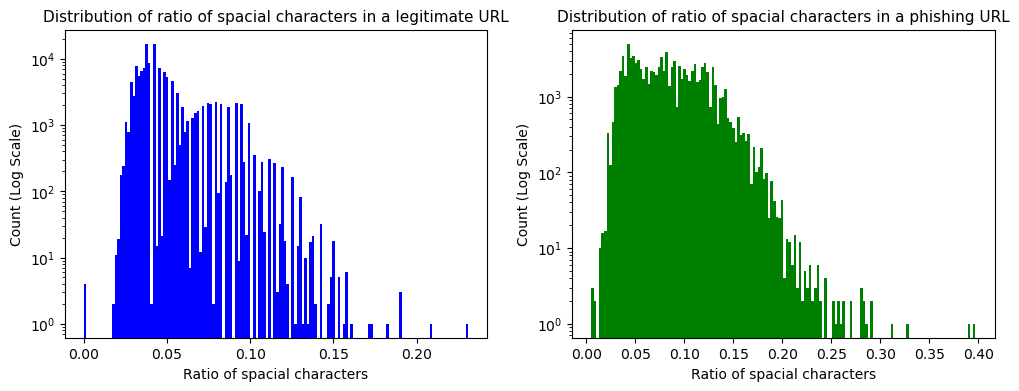

In [31]:
#Data
data1 = df[df['label'] == 1]['SpacialCharRatioInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['SpacialCharRatioInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of ratio of spacial characters in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Ratio of spacial characters")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of ratio of spacial characters in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Ratio of spacial characters")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

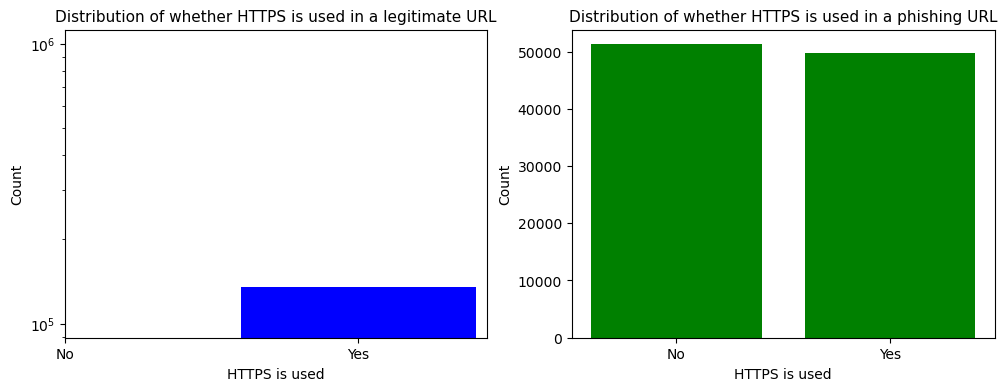

In [32]:
# Data
data1 = df[df['label'] == 1]['IsHTTPS'].value_counts()  # Counts for legitimate URL data
data2 = df[df['label'] == 0]['IsHTTPS'].value_counts()  # Counts for phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar plot
axes[0].bar(data1.index, data1.values, color=['blue'])
axes[0].set_title("Distribution of whether HTTPS is used in a legitimate URL", fontsize=11)  # Title
axes[0].set_xlabel("HTTPS is used")
axes[0].set_ylabel("Count")
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[0].set_xticklabels(['No', 'Yes']) 

# Plot the second bar plot
axes[1].bar(data2.index, data2.values, color='green')
axes[1].set_title("Distribution of whether HTTPS is used in a phishing URL", fontsize=11)
axes[1].set_xlabel("HTTPS is used")
axes[1].set_ylabel("Count")
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[1].set_xticklabels(['No', 'Yes']) 

plt.show()

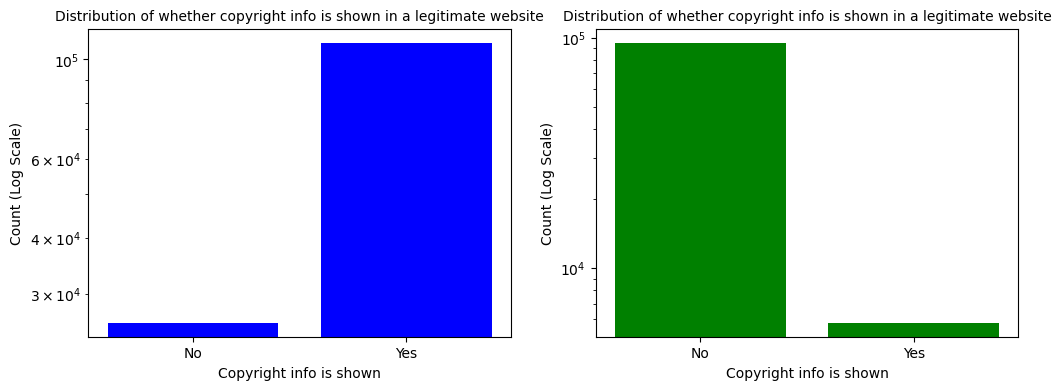

In [35]:
# Data
data1 = df[df['label'] == 1]['HasCopyrightInfo'].value_counts()  # Counts for legitimate URL data
data2 = df[df['label'] == 0]['HasCopyrightInfo'].value_counts()  # Counts for phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar plot
axes[0].bar(data1.index, data1.values, color=['blue'])
axes[0].set_title("Distribution of whether copyright info is shown in a legitimate website", fontsize=10)  # Title
axes[0].set_xlabel("Copyright info is shown")
axes[0].set_ylabel("Count (Log Scale)")
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[0].set_xticklabels(['No', 'Yes']) 

# Plot the second bar plot
axes[1].bar(data2.index, data2.values, color='green')
axes[1].set_title("Distribution of whether copyright info is shown in a legitimate website", fontsize=10)
axes[1].set_xlabel("Copyright info is shown")
axes[1].set_ylabel("Count (Log Scale)")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[1].set_xticklabels(['No', 'Yes']) 

plt.show()

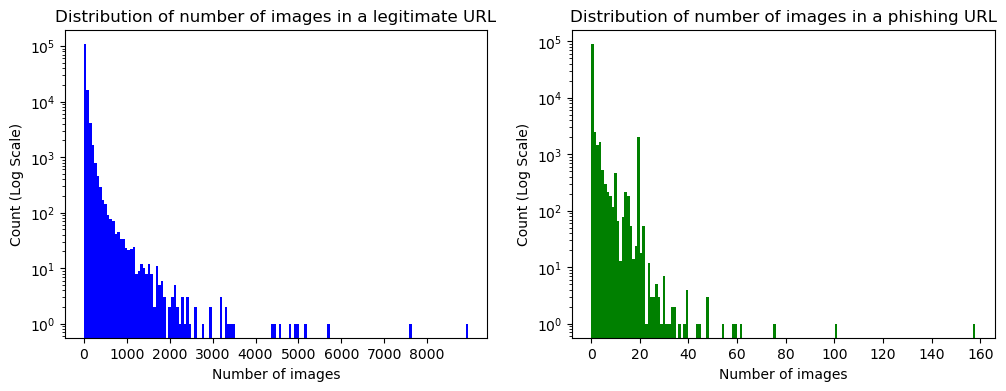

In [36]:
#Data
data1 = df[df['label'] == 1]['NoOfImage']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfImage']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of number of images in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of images")
axes[0].set_xticks(ticks=range(0,9000,1000))
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of number of images in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of images")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()